In [1]:
import numpy as np
import torch
import torch_struct
from torch_struct import AlignmentCRF
import matplotlib.pyplot as plt

print('done')

done


/Users/distiller/project/conda/conda-bld/pytorch_1587428061935/work/aten/src/ATen/native/BinaryOps.cpp:81: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.


tensor([2.1982, 2.5297, 2.5274], grad_fn=<SqueezeBackward1>)


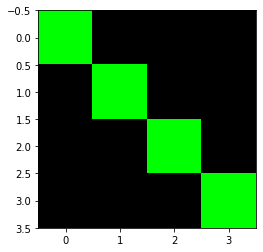

In [2]:
batch, N, M = 3, 4, 4 # 3, 15, 20
def show_deps(tree):
    plt.imshow(tree.detach())

log_potentials = torch.rand(batch, N, M, 3)
log_potentials[:,:,:,0] = -1.0
log_potentials[:,:,:,2] = -1.0
dist = torch_struct.AlignmentCRF(log_potentials) #, local=True, max_gap=1
show_deps(dist.argmax[0])

print(dist.partition)

(64, 14, 14, 3)
-20.0
-18.173464 -50.989265 3.8146973e-06


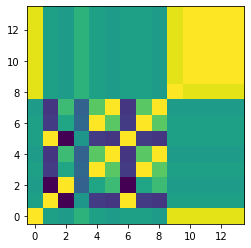

In [44]:
# Dump from tensormorph for debugging
log_potentials = np.load('/Users/colin/Desktop/log_potentials.npy')
print(log_potentials.shape)
plt.imshow(log_potentials[0,:,:,1], origin='lower')
print(np.mean(log_potentials[0,:,:,0]))
print(np.mean(log_potentials[0,:,:,1]),
      np.min(log_potentials[0,:,:,1]),
      np.max(log_potentials[0,:,:,1]))

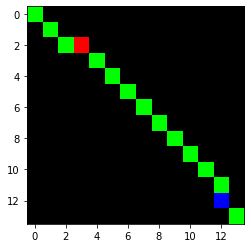

In [45]:
log_potentials_ = torch.FloatTensor(log_potentials)
dist = torch_struct.AlignmentCRF(log_potentials_[:1])
show_deps(dist.argmax[0])